# Doodles and notes - nothing important

In [15]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import network_diffusion as nd
import networkx as nx
import pandas as pd
import itertools

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
layer_1 = nx.Graph(
    (
        [1, 4], [2, 4], [2, 3], [3, 4], [3, 5],
        [3, 6], [4, 5], [7, 9], [8, 9], [8, 10]
    )
)

layer_2 = nx.Graph(
    (
        [1, 2], [2, 7], [2, 11], [4, 5], [4, 6],
        [5, 11], [6, 10], [7, 9], [8, 9], [8, 10],
        [10, 11]
    )
)

layer_3 = nx.Graph(
    (
        [1, 4], [2, 6], [2, 9], [3, 4], [3, 5],
        [4, 5], [5, 6], [5, 11], [6, 9], [7, 9], [10, 11]
    )
)

net = nd.MultilayerNetwork.load_layers_nx([layer_1, layer_2, layer_3], ["l1", "l2", "l3"])

## K-shell for single layer network

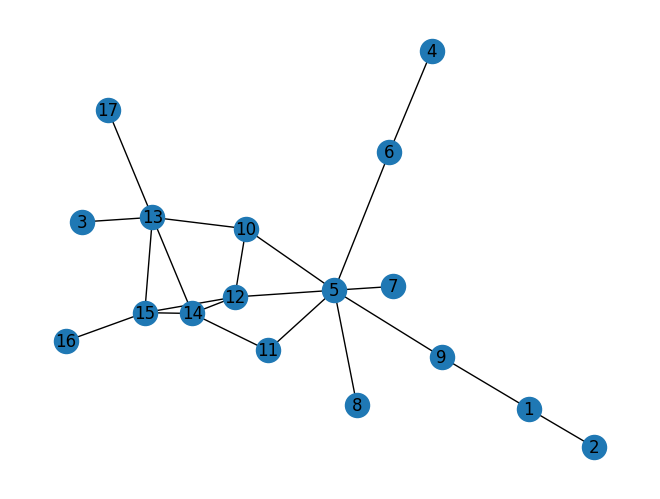

In [58]:

g = nx.Graph()
g.add_edges_from(
    [(1, 2), (1, 9), (3, 13), (4, 6),
    (5, 6), (5, 7), (5, 8), (5, 9),
    (5, 10), (5, 11), (5, 12), (10, 12),
    (10, 13), (11, 14), (12, 14),
    (12, 15), (13, 14), (13, 15),
    (13, 17), (14, 15), (15, 16)]
)
nx.draw(g, with_labels=True)

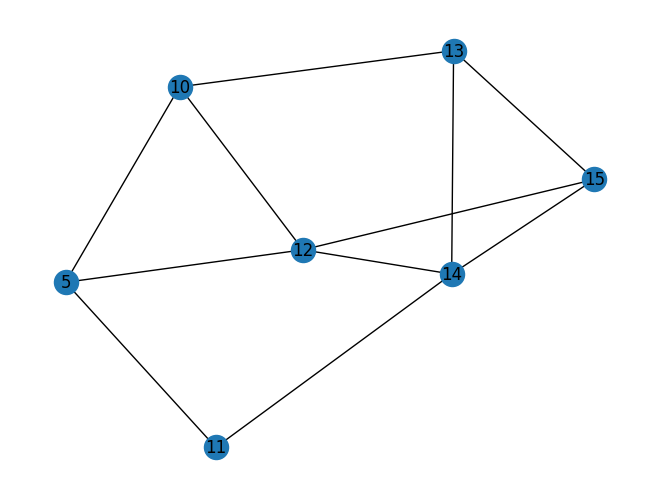

In [63]:
gg = nx.core.k_shell(g, 2)
nx.draw(gg, with_labels=True)

In [53]:
net = nd.MultilayerNetwork.load_mlx(file_path="data/aucs.mpx")
fb = net.layers["facebook"]

AttributeError: type object 'MultilayerNetwork' has no attribute 'load_mlx'

In [54]:
gg = fb.copy()
fig, axes = plt.subplots(nrows=3, ncols=3)
row = -1
col = -1

for k in range(9):

    row += 1
    if row % 3 == 0:
        row = 0
        col += 1

    axis = axes[col][row]
    axis.set_title(f"K={k}")

    ggg = nx.k_shell(gg, k=k)
    
    nx.draw(ggg, with_labels=True, ax=axis)
    print(k, [[node, nx.degree(gg, node)] for node in ggg.nodes()])

    if len(list(gg.nodes())) == 0:
        break

fig.set_size_inches(18.5, 10.5)
fig.tight_layout()

NameError: name 'fb' is not defined

In [ ]:
nx.draw(sh:=nx.k_shell(fb), with_labels=True)
print(k, [[node, nx.degree(fb, node)] for node in sh.nodes()])

In [ ]:
nx.draw(fb, with_labels=True)

In [ ]:
def create_k_shell_list(g: nx.Graph):
    ksh_deepest_nodes = set(nx.k_shell(g).nodes())
    shell_ranking = {}
    k = 0

    while True:
        ksh_nodes = set(nx.k_shell(g, k=k).nodes())
        shell_ranking[k] = ksh_nodes
        if ksh_nodes == ksh_deepest_nodes:
            break
        k += 1
    
    return shell_ranking

In [ ]:
rl = create_k_shell_list(fb)

In [ ]:
print(sorted(rl)[::-1])

In [ ]:
rl

In [ ]:
ll = [list(rl[k]) for k in sorted(rl)[::-1]]
import itertools

In [ ]:
lll = [n for cohort in sorted(rl)[::-1] for n in rl[cohort]]

In [ ]:
lll

## Degree centrality

In [19]:
print(net.get_actors_num())
for actor in net.get_actors():
    print(actor)

11
actor id: 1, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 4, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 2, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 3, layers and states: {'l1': None, 'l3': None}
actor id: 5, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 6, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 7, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 9, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 8, layers and states: {'l1': None, 'l2': None}
actor id: 10, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 11, layers and states: {'l2': None, 'l3': None}


In [ ]:
selector = nd.seeding.PageRankSeedSelector()
ranking = selector(net, actorwise=True)
print([r.actor_id for r in ranking])

In [ ]:
nx.pagerank(net.layers["l1"])

In [ ]:
my_dict = { 'num6': 6, "34": 2, 'num2': 2, 'num4': 4, 'num1': 1, 'num5': 5}
sortedDict = sorted(my_dict.values())

In [ ]:
sortedDict

In [ ]:
import numpy as np

In [ ]:
seeding_budgets = np.arange(0, 101, 1)

In [ ]:
s = [(a, 100 - a) for a in np.arange(0, 101, 1)]

In [ ]:
print(s)

In [ ]:
z = np.logspace(-2, 0, num=100)

In [ ]:
print(z)

## K-shell for multi layer network

In [9]:
from network_diffusion.mln.functions import k_shell_actorwise, degree, neighbourhood_size

net ## net from degree centrality
degrees = degree(net)
sorted(
        [*degrees.keys()],
        key=lambda x: degree(net)[x],
        reverse=True,
)

[MLNetworkActor: 4 at 140297033922256,
 MLNetworkActor: 5 at 140297034023888,
 MLNetworkActor: 2 at 140297033917600,
 MLNetworkActor: 9 at 140297033260080,
 MLNetworkActor: 3 at 140297033917264,
 MLNetworkActor: 6 at 140297034035792,
 MLNetworkActor: 10 at 140297033263392,
 MLNetworkActor: 11 at 140297033262096,
 MLNetworkActor: 7 at 140297034029456,
 MLNetworkActor: 8 at 140297033255760,
 MLNetworkActor: 1 at 140297033910928]

In [5]:
neighbourhood_size(net)

{MLNetworkActor: 1 at 140297034375536: 2,
 MLNetworkActor: 4 at 140297034372032: 5,
 MLNetworkActor: 2 at 140297030718880: 7,
 MLNetworkActor: 3 at 140297030723632: 4,
 MLNetworkActor: 5 at 140297033752656: 4,
 MLNetworkActor: 6 at 140297033746656: 6,
 MLNetworkActor: 7 at 140297033749536: 2,
 MLNetworkActor: 9 at 140297033757072: 4,
 MLNetworkActor: 8 at 140297034473840: 2,
 MLNetworkActor: 10 at 140297034470576: 3,
 MLNetworkActor: 11 at 140297034466352: 3}

In [6]:

net.layers["l1"].nodes[5]["status"] = "test"
k_net = k_shell_actorwise(net)
print(degree(k_net))
print(k_net.layers["l1"].nodes[5]["status"])

{MLNetworkActor: 4 at 140297034027680: 7, MLNetworkActor: 2 at 140297034025520: 3, MLNetworkActor: 3 at 140297034023888: 6, MLNetworkActor: 5 at 140297034038336: 6, MLNetworkActor: 6 at 140297034038000: 4}
test


In [7]:
ksh_deepest_nodes = set(k_shell_actorwise(net).get_actors())
shell_ranking = {}
k = 0

# iterate until deepest shell is achieved
while True:

    # compute k-shell cohort
    ksh_nodes = k_shell_actorwise(net, k=k).get_actors()

    # sort it according to degree in the graph
    shell_ranking[k] = sorted(
        ksh_nodes,
        key=lambda x: degree(net)[x],
        reverse=True,
    )

    # if the deepest shell is reached breake, othrwise increase k
    if set(ksh_nodes) == ksh_deepest_nodes:
        break
    k += 1

shell_ranking

{0: [],
 1: [],
 2: [MLNetworkActor: 9 at 140297033831792,
  MLNetworkActor: 10 at 140297033826464,
  MLNetworkActor: 11 at 140297033837792,
  MLNetworkActor: 7 at 140297033265360,
  MLNetworkActor: 8 at 140297033838176,
  MLNetworkActor: 1 at 140297033256336],
 3: [MLNetworkActor: 4 at 140297033840048,
  MLNetworkActor: 5 at 140297033832128,
  MLNetworkActor: 2 at 140297033835632,
  MLNetworkActor: 3 at 140297033830928,
  MLNetworkActor: 6 at 140296968577680]}

In [8]:
ksh_selector = nd.seeding.KShellSeedSelector()
ksh_selector.actorwise(net)

[MLNetworkActor: 4 at 140297034123680,
 MLNetworkActor: 5 at 140297034129776,
 MLNetworkActor: 2 at 140297034128480,
 MLNetworkActor: 3 at 140297034135104,
 MLNetworkActor: 6 at 140297034125744,
 MLNetworkActor: 9 at 140296968570336,
 MLNetworkActor: 10 at 140296968580368,
 MLNetworkActor: 11 at 140297033924032,
 MLNetworkActor: 7 at 140296968570624,
 MLNetworkActor: 8 at 140296968579360,
 MLNetworkActor: 1 at 140296968581472]

## reading from .edges

In [ ]:
def get_ckm_network(path):
    df = pd.read_csv(path, names=["node_1", "node_2", "layer"])
    net_dict = {l_name: nx.Graph() for l_name in [*df["layer"].unique()]}
    for _, row in df.iterrows():
        net_dict[row["layer"]].add_edge(row["node_1"], row["node_2"])
    return nd.MultilayerNetwork.load_layers_nx(
        layer_names=[*net_dict.keys()], network_list=[*net_dict.values()]
    )

In [ ]:
ckm = "data/CKM-Physicians-Innovation_4NoNature.edges"
eu_transportation = "data/EUAirTransportation_multiplex_4NoNature.edges"
lazega = "data/Lazega-Law-Firm_4NoNatureNoLoops.edges"



In [ ]:
net = get_ckm_network(lazega)
print(net.get_actors_num())
print(_ := net.get_nodes_num(), sum(_.values()), len(set(_.keys())))

In [ ]:
def get_aucs_network(file_path):
    return nd.MultilayerNetwork.load_mlx(file_path)

net = get_aucs_network(file_path="data/erererererNoLoops.mpx")
print(net.get_actors_num())
print(_ := net.get_nodes_num(), sum(_.values()), len(set(_.keys())), sum([l.number_of_edges() for l in net.layers.values()]))

## Comparison of selected seeds

In [24]:
from loader import *
SEED_SELECTORS = (
    nd.seeding.KShellSeedSelector(),
    nd.seeding.KShellExtendedSeedSelector()
)
NETWORKS = {
    "toy": net,
    # "aucs": get_aucs_network(),
    # "ckm_physicians": get_ckm_physicians_network(),
    # "eu_transportation": get_eu_transportation_network(),
    # "lazega": get_lazega_network(),
    # "er2": get_er2_network(),
    # "er3": get_er3_network(),
    # "er5": get_er5_network(),
    # "sf2": get_sf2_network(),
    # "sf3": get_sf3_network(),
    # "sf5": get_sf5_network(),
}

experiments = itertools.product(SEED_SELECTORS, NETWORKS)

for investigated_case in experiments:

    seed_selector = investigated_case[0]
    network = NETWORKS[investigated_case[1]]

    seeds = seed_selector.actorwise(network)
    print(seed_selector, investigated_case[1], [s.actor_id for s in seeds])
    print("\n")



seed selection method
--------------------------------------------
	K Shell decomposition computed nodewise
 toy [3, 2, 5, 4, 11, 10, 6, 7, 9, 8, 1]


seed selection method
--------------------------------------------
	K Shell decomposition computed actorwise
 toy [4, 5, 2, 3, 6, 9, 10, 11, 7, 8, 1]


